In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline

In [2]:
dtrain = pd.read_csv("D:\Coding_data/fashion-mnist_train.csv")
dtest = pd.read_csv("D:\Coding_data/fashion-mnist_test.csv")

In [3]:
dtrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


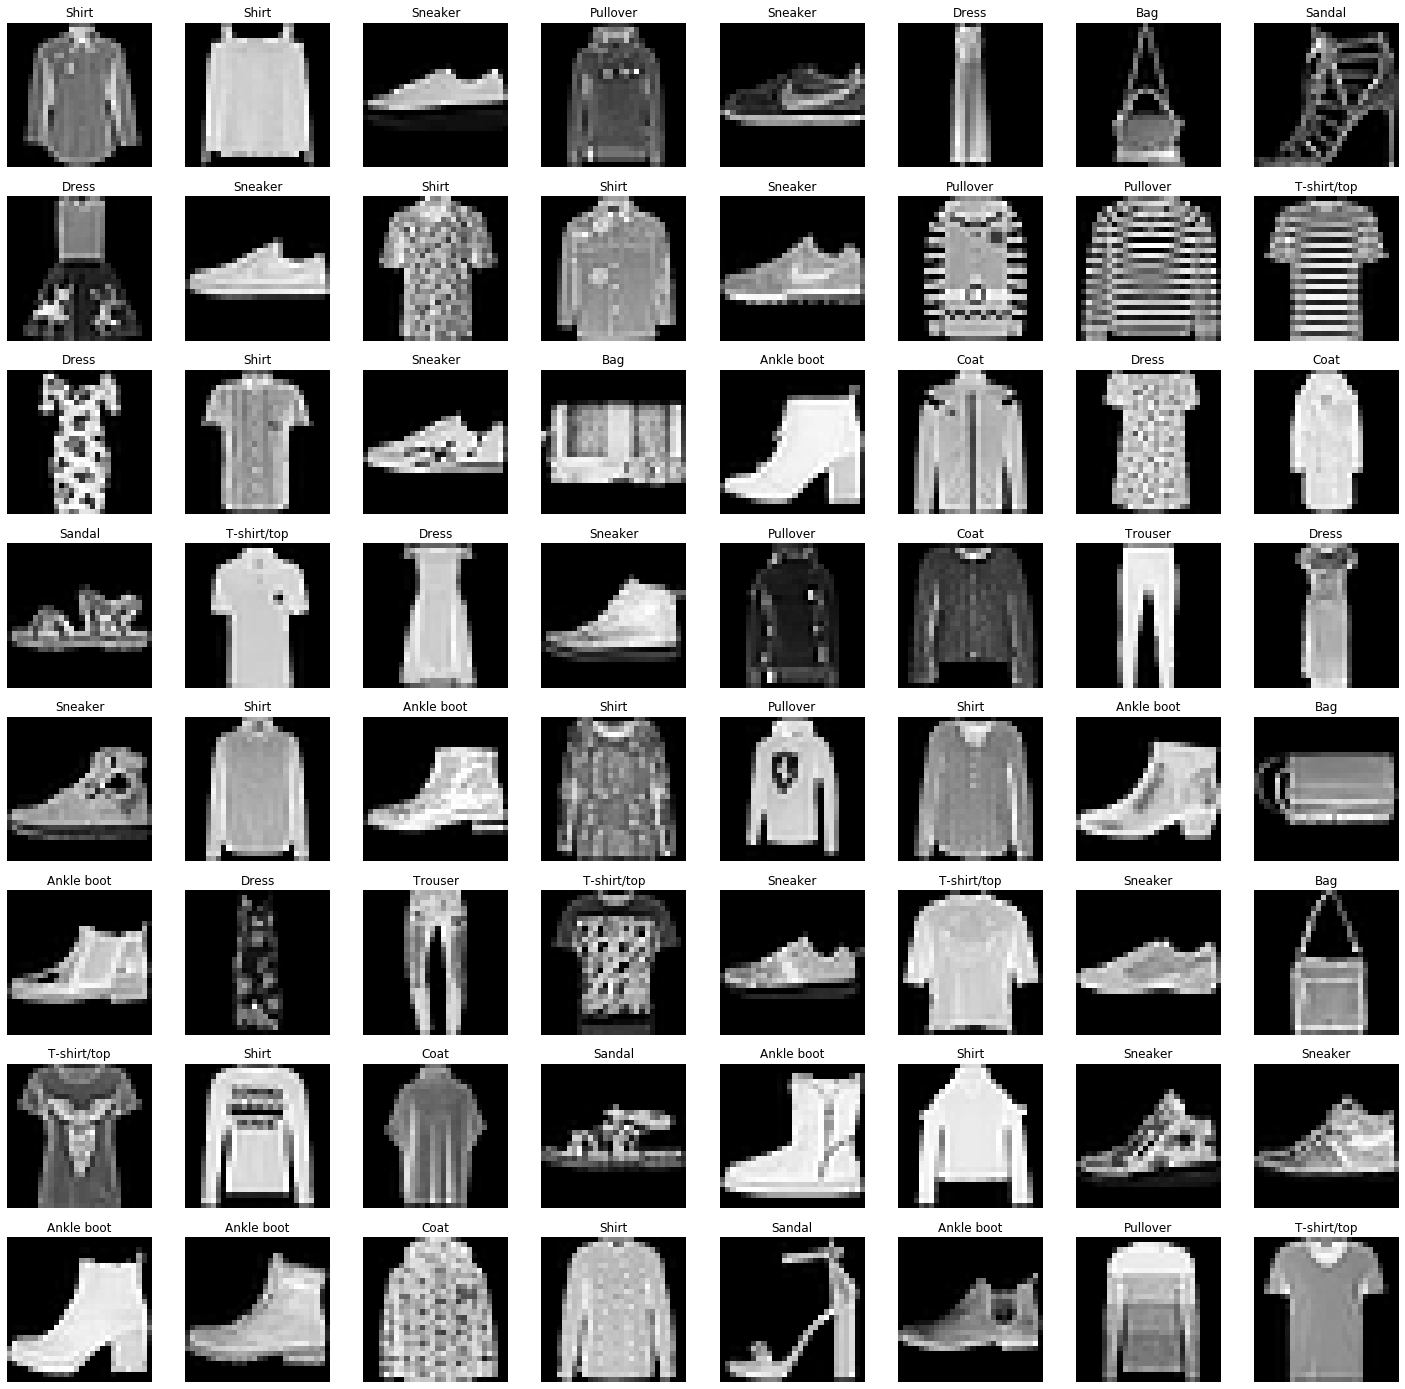

In [4]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

fig, axes = plt.subplots(8, 8, figsize = (25,25))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = dtrain.drop('label', axis=1).values[index].reshape(28,28)
        cloths = dtrain['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [35]:
predict = 'label'

dtrain_X = dtrain.drop(predict, axis=1)
dtrain_y = dtrain[predict]

X_test = dtest.drop(predict, axis=1)
y_test = dtest[predict]

X_train, X_valid, y_train, y_valid = train_test_split(dtrain_X, dtrain_y, test_size=0.1)

In [56]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
  7.000e+00 8.000e+00 9.000e+00]
 [5.401e+03 5.402e+03 5.386e+03 5.348e+03 5.393e+03 5.404e+03 5.438e+03
  5.386e+03 5.419e+03 5.423e+03]]


In [36]:
fac = 0.99 / 255
X_train = np.asfarray(X_train) * fac + 0.01
X_valid = np.asfarray(X_valid) * fac + 0.01
X_test = np.asfarray(X_test) * fac + 0.01

y_train = np.asfarray(y_train)
y_valid = np.asfarray(y_valid)
y_test = np.asfarray(y_test)

In [39]:
print("Train shape:\n", X_train.shape)
print("Validation shape:\n", X_valid.shape)
print("Test shape:\n", X_test.shape)

Train shape:
 (54000, 784)
Validation shape:
 (6000, 784)
Test shape:
 (10000, 784)


In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(10, activation="softmax")
])

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(), metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 33s 617us/sample - loss: 0.5769 - accuracy: 0.7900 - val_loss: 0.4135 - val_accuracy: 0.8507
Epoch 2/20
54000/54000 [==============================] - 34s 626us/sample - loss: 0.4484 - accuracy: 0.8374 - val_loss: 0.3923 - val_accuracy: 0.8575
Epoch 3/20
54000/54000 [==============================] - 34s 626us/sample - loss: 0.4173 - accuracy: 0.8487 - val_loss: 0.3641 - val_accuracy: 0.8705
Epoch 4/20
54000/54000 [==============================] - 34s 625us/sample - loss: 0.3975 - accuracy: 0.8562 - val_loss: 0.3421 - val_accuracy: 0.8770
Epoch 5/20
54000/54000 [==============================] - 34s 627us/sample - loss: 0.3816 - accuracy: 0.8613 - val_loss: 0.3430 - val_accuracy: 0.8830
Epoch 6/20
54000/54000 [==============================] - 34s 628us/sample - loss: 0.3721 - accuracy: 0.8643 - val_loss: 0.3379 - val_accuracy: 0.8868
Epoch 7/20
54000/54000 [=====================

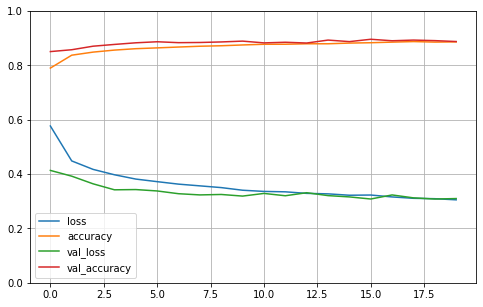

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [55]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 109us/sample - loss: 0.3131 - accuracy: 0.8884


[0.3130811600506306, 0.8884]